In [19]:
# import opencv 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

source_image = cv2.imread("demo_source.png")
target_image1 = cv2.imread("left.png")
target_image2 = cv2.imread("demo_target2.png")


In [14]:
!pip install mediapipe
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

zsh:1: /Users/xiaowenyuan/Library/Python/3.9/bin/pip: bad interpreter: /Library/Developer/CommandLineTools/usr/bin/python3: no such file or directory
^C
ERROR: Operation cancelled by user


In [15]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=2)
detector = vision.FaceLandmarker.create_from_options(options)



# STEP 3: Load the input image.
source_image_loader = mp.Image(image_format=mp.ImageFormat.SRGB, data = source_image)

target_image1_loader = mp.Image(image_format=mp.ImageFormat.SRGB, data = target_image1)
target_image2_loader = mp.Image(image_format=mp.ImageFormat.SRGB, data = target_image2)

# STEP 4: Detect face landmarks from the input image.
source_detection_result = detector.detect(source_image_loader)
target1_detection_result = detector.detect(target_image1_loader)
target2_detection_result = detector.detect(target_image2_loader)

source_eye_left2= (source_detection_result.face_landmarks[0][468].x * source_image.shape[1], source_detection_result.face_landmarks[0][468].y * source_image.shape[0])
source_eye_right2 = (source_detection_result.face_landmarks[0][473].x * source_image.shape[1], source_detection_result.face_landmarks[0][473].y * source_image.shape[0])

source_eye_left1 = (source_detection_result.face_landmarks[1][468].x * source_image.shape[1], source_detection_result.face_landmarks[1][468].y * source_image.shape[0])

source_eye_right1 = (source_detection_result.face_landmarks[1][473].x * source_image.shape[1], source_detection_result.face_landmarks[1][473].y * source_image.shape[0])
target_image1_eye_left = (target1_detection_result.face_landmarks[0][468].x * target_image1.shape[1], target1_detection_result.face_landmarks[0][468].y * target_image1.shape[0])
target_image1_eye_right = (target1_detection_result.face_landmarks[0][473].x * target_image1.shape[1], target1_detection_result.face_landmarks[0][473].y * target_image1.shape[0])

target_image2_eye_left = (target2_detection_result.face_landmarks[0][468].x * target_image2.shape[1], target2_detection_result.face_landmarks[0][468].y * target_image2.shape[0])
target_image2_eye_right = (target2_detection_result.face_landmarks[0][473].x * target_image2.shape[1], target2_detection_result.face_landmarks[0][473].y * target_image2.shape[0])




W20240511 16:09:16.775357 4118117056 face_landmarker_graph.cc:168] Face blendshape model contains CPU only ops. Sets FaceBlendshapesGraph acceleration to Xnnpack.


In [58]:
def get_face_contour(face_landmarks, image):
    indices = [10, 297, 67, 21, 127, 94, 58, 136, 149, 148, 377, 378, 365, 367, 435, 366, 447, 389, 284]
    face_contour = []
    for i in indices:
        face_contour.append((face_landmarks[i].x * image.shape[1], face_landmarks[i].y * image.shape[0]))
    convex_hull = cv2.convexHull(np.array(face_contour, dtype=np.float32)) 
    return convex_hull 

In [59]:
hull = get_face_contour(source_detection_result.face_landmarks[0], source_image) 

In [62]:
source_image.shape

(427, 640, 3)

In [60]:
hull = hull.reshape((-1, 2)).astype(np.int32)
hull

array([[510, 186],
       [510, 203],
       [503, 236],
       [497, 251],
       [484, 269],
       [468, 288],
       [448, 302],
       [413, 303],
       [383, 291],
       [352, 271],
       [326, 240],
       [315, 161],
       [326, 128],
       [382,  99],
       [435,  98],
       [480, 104],
       [504, 123],
       [508, 151]], dtype=int32)

True

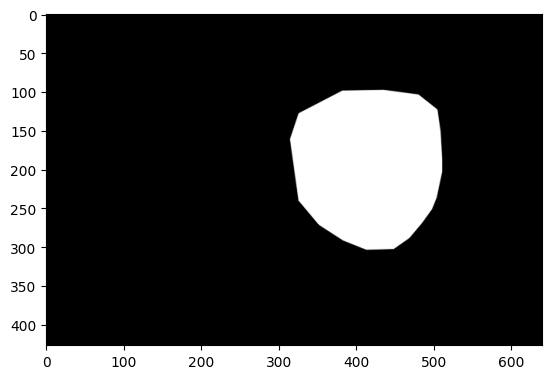

In [77]:
mask = np.zeros(source_image.shape[:2], dtype=np.uint8)
mask = cv2.drawContours(mask, [hull], -1, (255, 255, 255), -1, cv2.LINE_AA)
plt.imshow(mask, cmap='gray')
cv2.imwrite("mask.png", mask) 

In [28]:
target1_detection_result.face_blendshapes 

[[Category(index=0, score=7.579284329040092e-07, display_name='', category_name='_neutral'),
  Category(index=1, score=0.026377448812127113, display_name='', category_name='browDownLeft'),
  Category(index=2, score=0.02460203692317009, display_name='', category_name='browDownRight'),
  Category(index=3, score=0.010191574692726135, display_name='', category_name='browInnerUp'),
  Category(index=4, score=0.13447672128677368, display_name='', category_name='browOuterUpLeft'),
  Category(index=5, score=0.09861849248409271, display_name='', category_name='browOuterUpRight'),
  Category(index=6, score=9.254616998077836e-06, display_name='', category_name='cheekPuff'),
  Category(index=7, score=3.018384973074717e-07, display_name='', category_name='cheekSquintLeft'),
  Category(index=8, score=1.8121136236004531e-07, display_name='', category_name='cheekSquintRight'),
  Category(index=9, score=0.013211707584559917, display_name='', category_name='eyeBlinkLeft'),
  Category(index=10, score=0.00

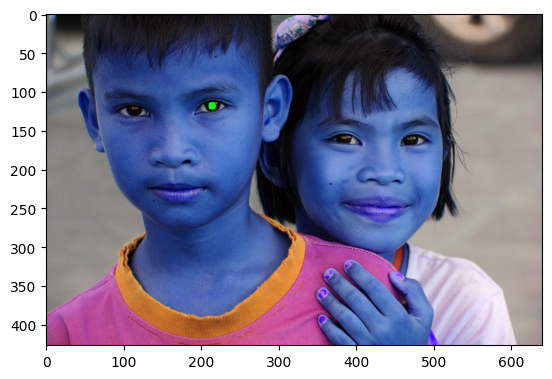

In [ ]:
source_image_copy = source_image.copy()

plt.imshow(cv2.circle(source_image_copy, (int(source_eye_right2[0]), int(source_eye_right2[1])), 5, (0, 255, 0), -1))
plt.show()

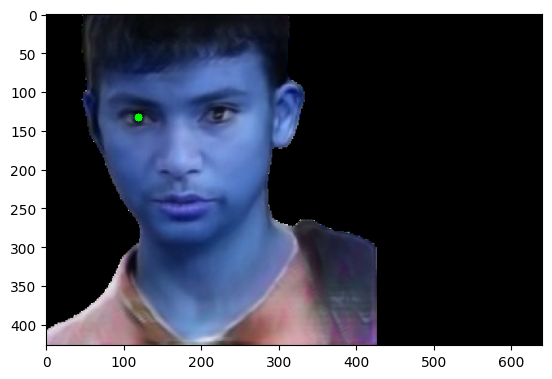

In [ ]:
target1 = target_image1.copy()
plt.imshow(cv2.circle(target1, (int(target_image1_eye_left[0]), int(target_image1_eye_left[1])), 5, (0, 255, 0), -1))

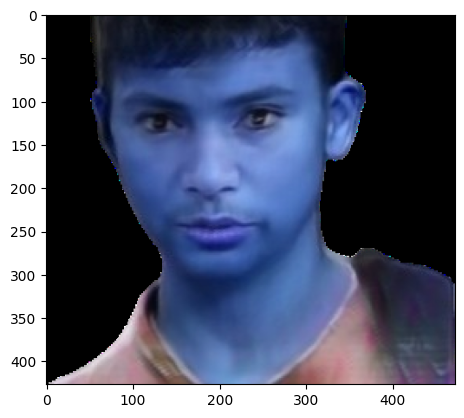

In [22]:
plt.imshow(target_image1)

In [25]:
def warp_images(source, target, source_left_eye, source_right_eye, target_left_eye, target_right_eye):
    dx = target_left_eye[0] - source_left_eye[0]
    dy = target_left_eye[1] - source_left_eye[1]
    
    height, width, _ = source.shape
    
    transformation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])

    # Apply the translation to image1
    translated_image = cv2.warpAffine(target, transformation_matrix, (width, height))

    # Overlay the translated image onto image2

    return translated_image


In [26]:
target1_warped = warp_images(source_image, target_image1, source_eye_left1, source_eye_right1, target_image1_eye_left, target_image1_eye_right)

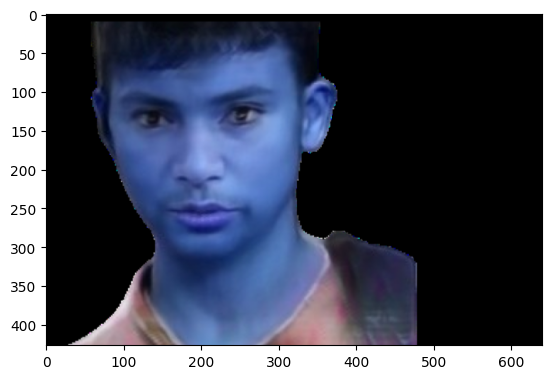

In [27]:
plt.imshow(target1_warped) 